In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics
plt.style.use('seaborn-v0_8')
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

SİMPLE DATA ANALYSİS

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(df.describe())
print("\n")
print(df.describe)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...      

In [4]:
df.isnull().any()


age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [5]:
len(df)

1338

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
print((df==0).sum())

age           0
sex           0
bmi           0
children    574
smoker        0
region        0
charges       0
dtype: int64


ANALYSİS

THE INFORMATION OF THE PERSON WHO SPENT THE MOST MONEY AND THE PERSON WHO SPENT THE LEAST MONEY.

In [8]:
highest_charge_row = df.loc[df["charges"].idxmax()].copy()
highest_charge_row


age                  54
sex              female
bmi               47.41
children              0
smoker              yes
region        southeast
charges     63770.42801
Name: 543, dtype: object

AS SEEN, THE PERSON WITH THE HIGHEST BILL IS A MIDDLE-AGED OR OLDER WOMAN, WITH NO CHILDREN, A SMOKER, AND A VERY HIGH BODY MASS INDEX (OVER 40, WHICH IS CONSIDERED OBESE)

In [9]:
lowest_charge_row = df.loc[df["charges"].idxmin()].copy()
lowest_charge_row


age                18
sex              male
bmi             23.21
children            0
smoker             no
region      southeast
charges     1121.8739
Name: 940, dtype: object

THE PERSON WITH THE LOWEST BILL IS A YOUNG, CHILDLESS INDIVIDUAL WITH A LOW BODY MASS INDEX, A NON-SMOKER, YET STILL HAS A BILL OF $1000.

DIFFERENCE BETWEEN MEN AND WOMEN

In [10]:
gender_charge_avg = df.groupby("sex")["charges"].mean()
gender_charge_total = df.groupby("sex")["charges"].sum()
highest_charge_female = df[df["sex"] == "female"]["charges"].max()  
highest_charge_male = df[df["sex"] == "male"]["charges"].max() 

print("Average spending")
print(gender_charge_avg)
print("\n")
print("Total spending")
print(gender_charge_total)
print("\n")
print(f"Highest charge (Female): {highest_charge_female}")
print(f"Highest charge (Male): {highest_charge_male}")

Average spending
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


Total spending
sex
female    8.321061e+06
male      9.434764e+06
Name: charges, dtype: float64


Highest charge (Female): 63770.42801
Highest charge (Male): 62592.87309


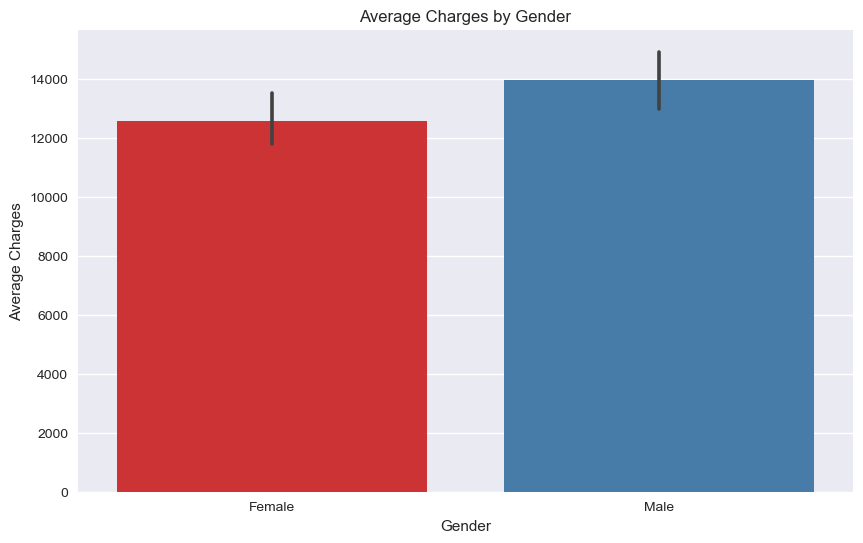

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x="sex", y="charges", data=df, estimator="mean", palette="Set1")
plt.xlabel("Gender")
plt.ylabel("Average Charges")
plt.title("Average Charges by Gender")
plt.xticks([0, 1], ["Female", "Male"])  # Labels instead of 0 and 1
plt.show()

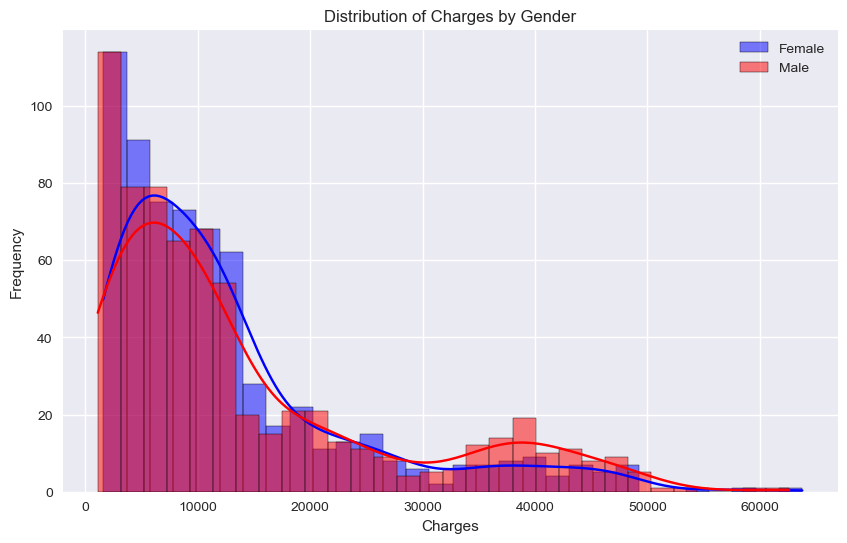

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['sex'] == "female"]['charges'], color='blue', label='Female', kde=True, bins=30)
sns.histplot(df[df['sex'] == "male"]['charges'], color='red', label='Male', kde=True, bins=30)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges by Gender')
plt.legend()
plt.show()

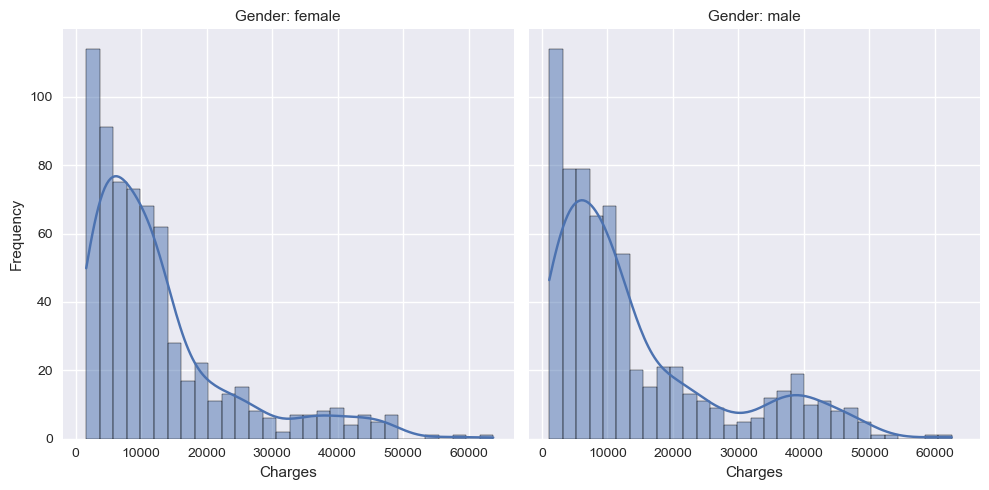

In [13]:
g = sns.FacetGrid(df, col="sex", height=5, aspect=1)
g.map(sns.histplot, "charges", kde=True, bins=30)
g.set_axis_labels("Charges", "Frequency")
g.set_titles("Gender: {col_name}")
plt.show()

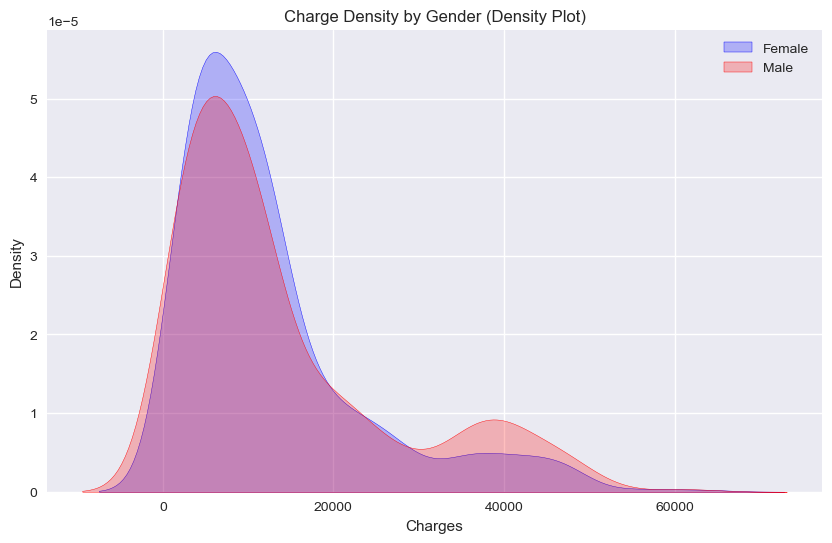

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['sex'] == "female"]['charges'], label='Female', shade=True, color='blue')
sns.kdeplot(df[df['sex'] == "male"]['charges'], label='Male', shade=True, color='red')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Charge Density by Gender (Density Plot)')
plt.legend()
plt.show()

as we can see in the graphics females spend less money to health than males

In [15]:
smoker_gender_count=df.groupby(["sex","smoker"]).size().unstack()
gender_smoker_rate=df.groupby("sex")["smoker"].value_counts(normalize=True).unstack()

print(smoker_gender_count)
print("\n")
print(gender_smoker_rate)

smoker   no  yes
sex             
female  547  115
male    517  159


smoker        no       yes
sex                       
female  0.826284  0.173716
male    0.764793  0.235207


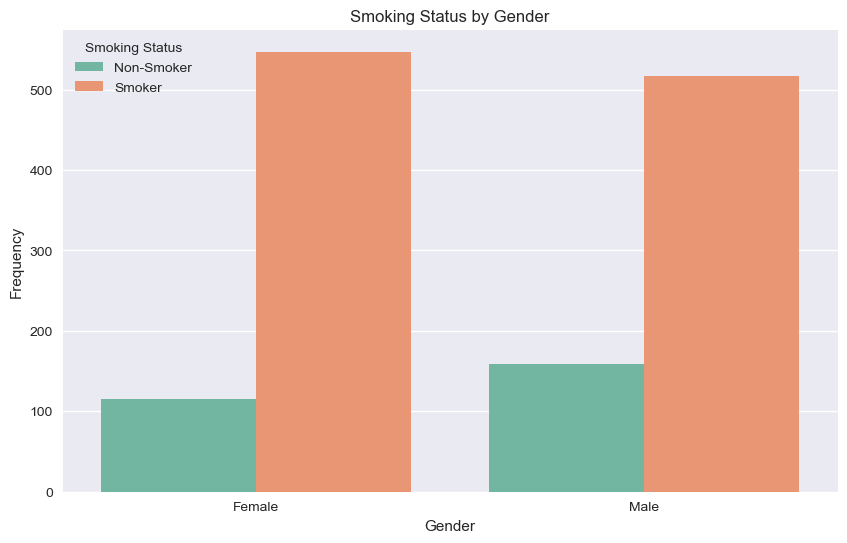

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x="sex", hue="smoker", data=df, palette="Set2")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Smoking Status by Gender")
plt.xticks([0, 1], ["Female", "Male"])  # Replace 0 and 1 with labels
plt.legend(title="Smoking Status", labels=["Non-Smoker", "Smoker"])
plt.show()

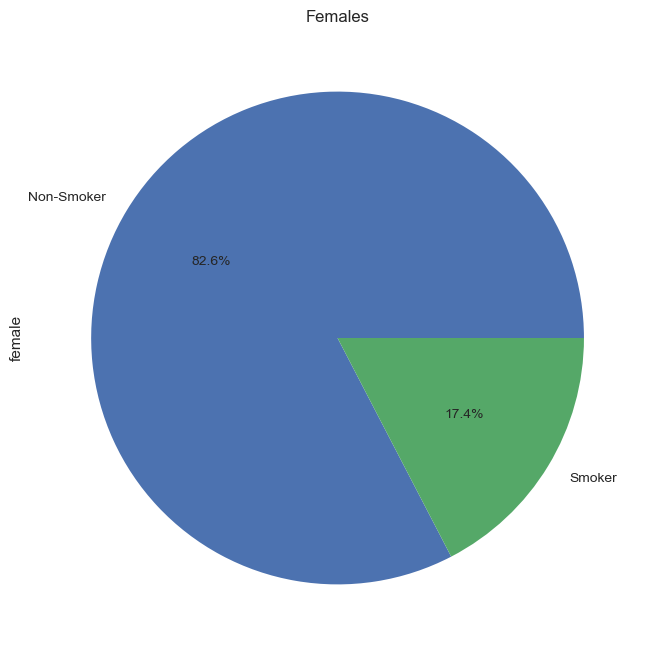

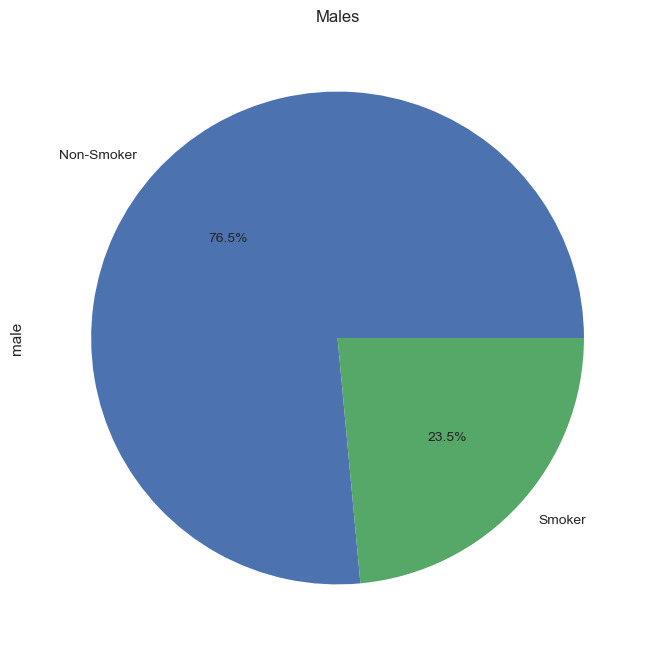

In [17]:
smoker_gender_count = df.groupby(['sex', 'smoker']).size().unstack()

# Pie chart for females
smoker_gender_count.loc["female"].plot.pie(autopct='%1.1f%%', labels=["Non-Smoker", "Smoker"], figsize=(8, 8), title="Females")
plt.show()

# Pie chart for males
smoker_gender_count.loc["male"].plot.pie(autopct='%1.1f%%', labels=["Non-Smoker", "Smoker"], figsize=(8, 8), title="Males")
plt.show()

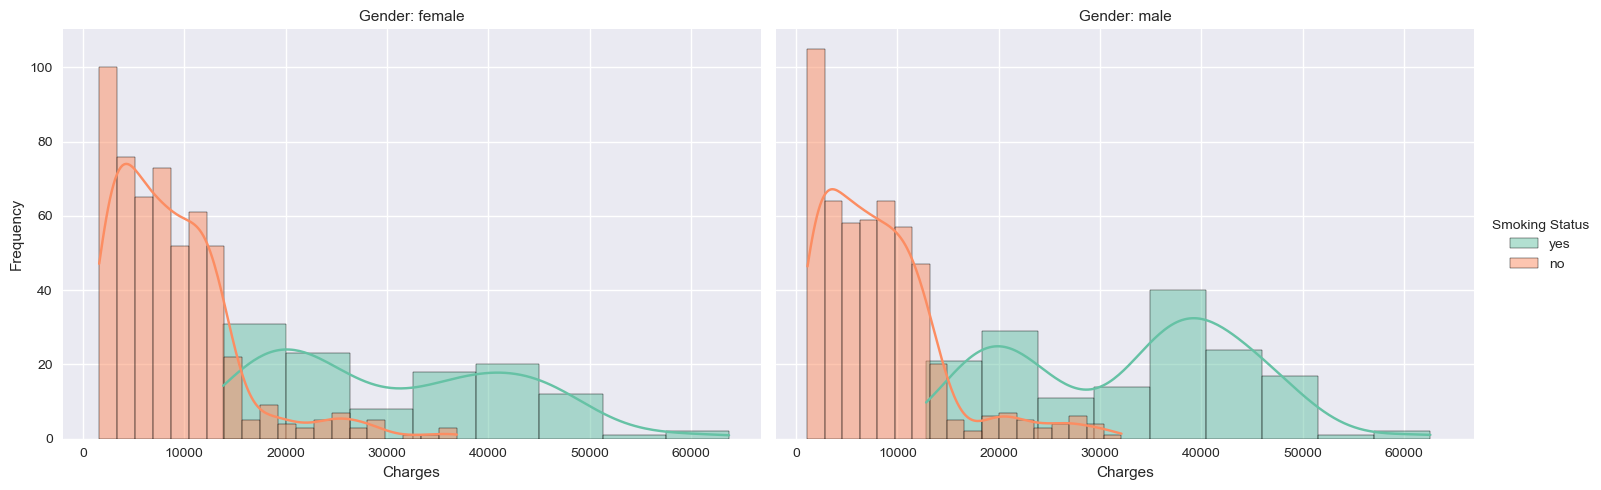

In [18]:
g = sns.FacetGrid(df, col="sex", hue="smoker", height=5, aspect=1.5, palette="Set2")
g.map(sns.histplot, "charges", kde=True)
g.set_axis_labels("Charges", "Frequency")
g.set_titles("Gender: {col_name}")
g.add_legend(title="Smoking Status")
plt.show()

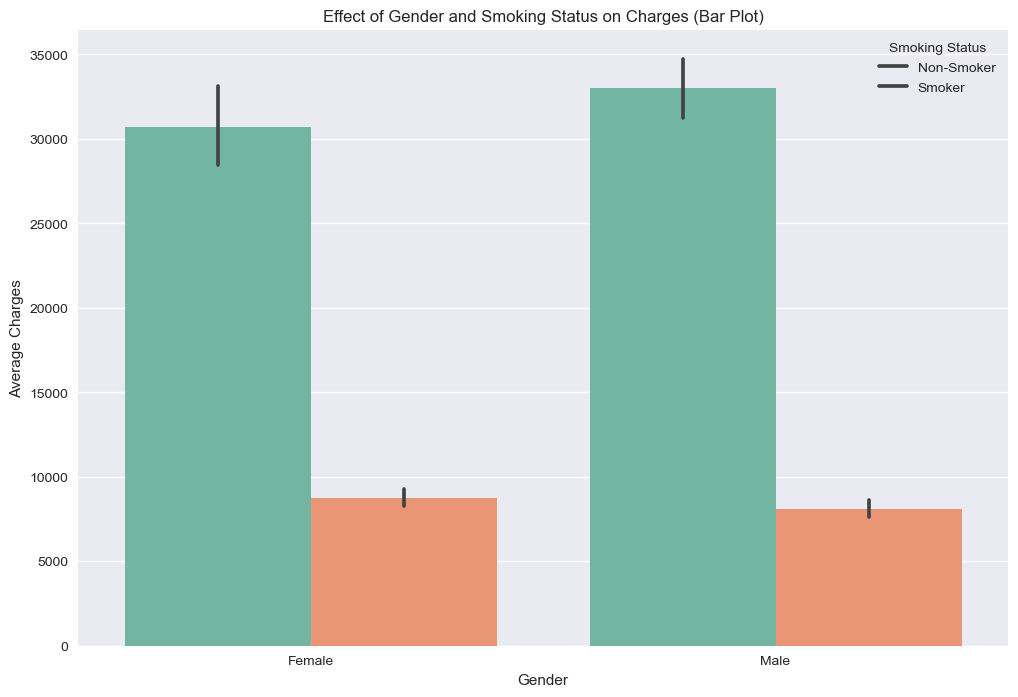

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x="sex", y="charges", hue="smoker", data=df, palette="Set2", estimator="mean")
plt.xlabel("Gender")
plt.ylabel("Average Charges")
plt.title("Effect of Gender and Smoking Status on Charges (Bar Plot)")
plt.xticks([0, 1], ["Female", "Male"])  # Replace 0 and 1 with labels
plt.legend(title="Smoking Status", labels=["Non-Smoker", "Smoker"])
plt.show()

charges by age and sex

In [20]:
avg_charges_for_young_women = df[(df["sex"] == "female") & (df["age"] < 30)]["charges"].mean()

avg_charges_for_young_men = df[(df["sex"] == "male") & (df["age"] < 30)]["charges"].mean()

avg_charges_for_old_women = df[(df["sex"] == "female") & (df["age"] > 30)]["charges"].mean()

avg_charges_for_old_men = df[(df["sex"] == "male") & (df["age"] > 30)]["charges"].mean()

print(f"Average charges for women under 30: {avg_charges_for_young_women:.2f}")
print(f"Average charges for men under 30: {avg_charges_for_young_men:.2f}")
print(f"Average charges for women over 30: {avg_charges_for_old_women:.2f}")
print(f"Average charges for men over 30: {avg_charges_for_old_men:.2f}")

Average charges for women under 30: 8560.36
Average charges for men under 30: 9761.41
Average charges for women over 30: 14454.19
Average charges for men over 30: 15936.85


bmi with age

In [21]:
avg_bmi_gender = df.groupby("sex")["bmi"].mean()
highest_bmi_male = df[df["sex"] == "male"]["bmi"].max()
highest_bmi_female = df[df["sex"] == "female"]["bmi"].max()

print(avg_bmi_gender)
print("\n")
print(f"Highest BMI for women: {highest_bmi_female}")
print(f"Highest BMI for men: {highest_bmi_male}")

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64


Highest BMI for women: 48.07
Highest BMI for men: 53.13


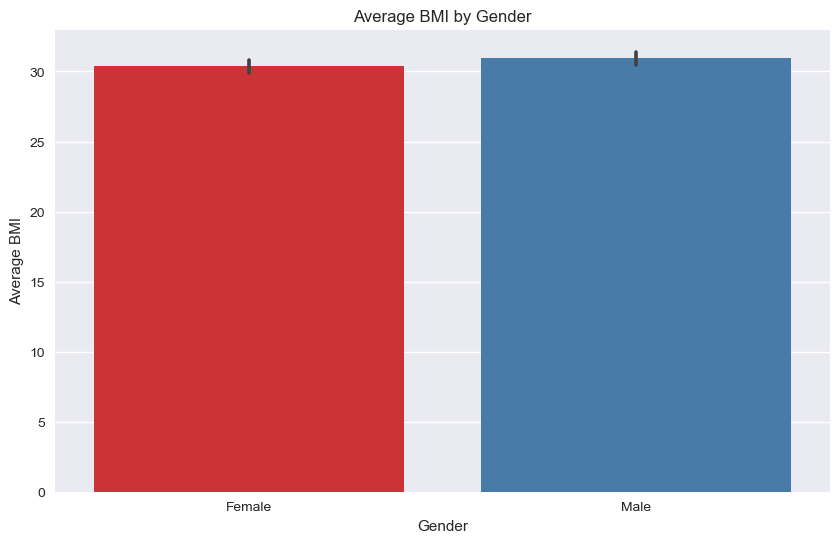

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x="sex", y="bmi", data=df, estimator="mean", palette="Set1")
plt.xlabel("Gender")
plt.ylabel("Average BMI")
plt.title("Average BMI by Gender")
plt.xticks([0, 1], ["Female", "Male"])  # Replace 0 and 1 with labels
plt.show()

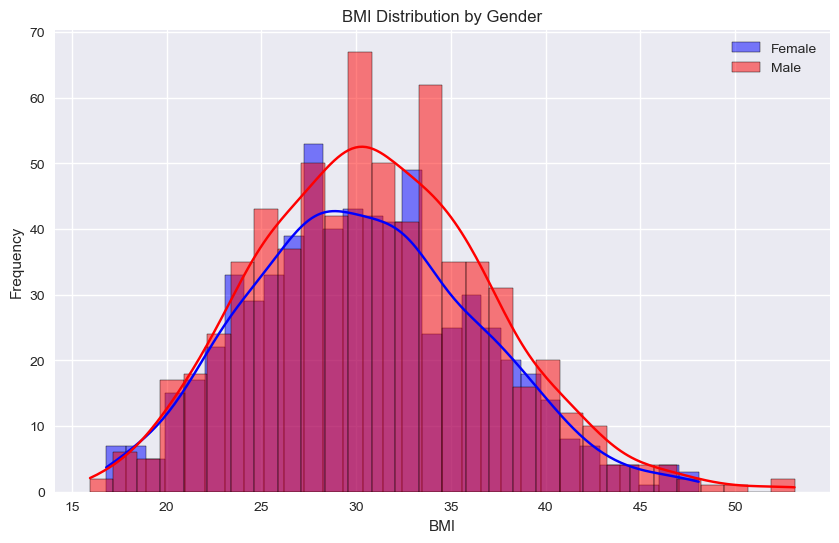

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['sex'] == "female"]['bmi'], color='blue', label='Female', kde=True, bins=30)
sns.histplot(df[df['sex'] == "male"]['bmi'], color='red', label='Male', kde=True, bins=30)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution by Gender')
plt.legend()
plt.show()

SMOKER AND NON SMOKER COMPARISON

In [24]:
smoker_charge_avg = df.groupby("smoker")["charges"].mean()
smoker_charge_total = df.groupby("smoker")["charges"].sum()

print("Average Spending")
print(smoker_charge_avg)
print("\n")
print("Total Spending")
print(smoker_charge_total)


Average Spending
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


Total Spending
smoker
no     8.974061e+06
yes    8.781764e+06
Name: charges, dtype: float64


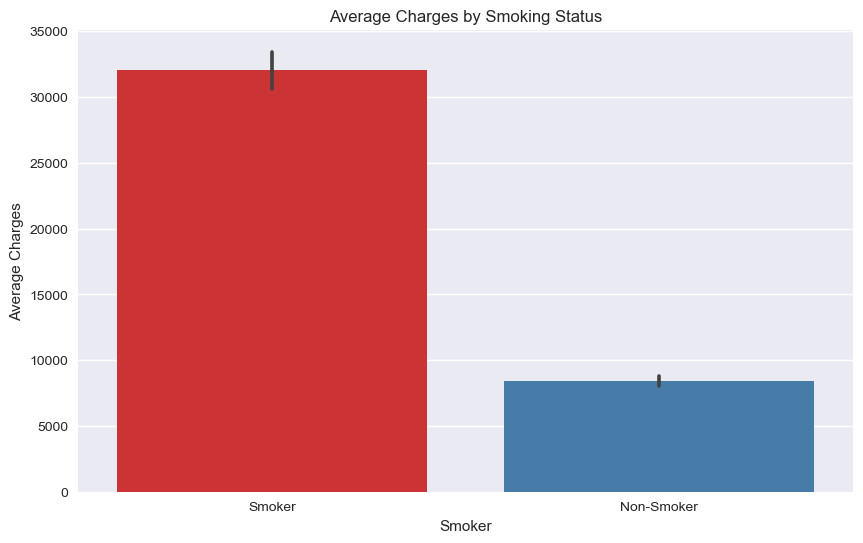

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x="smoker", y="charges", data=df, estimator="mean", palette="Set1")
plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.title("Average Charges by Smoking Status")
plt.xticks([0, 1], ["Smoker", "Non-Smoker"])
plt.show()

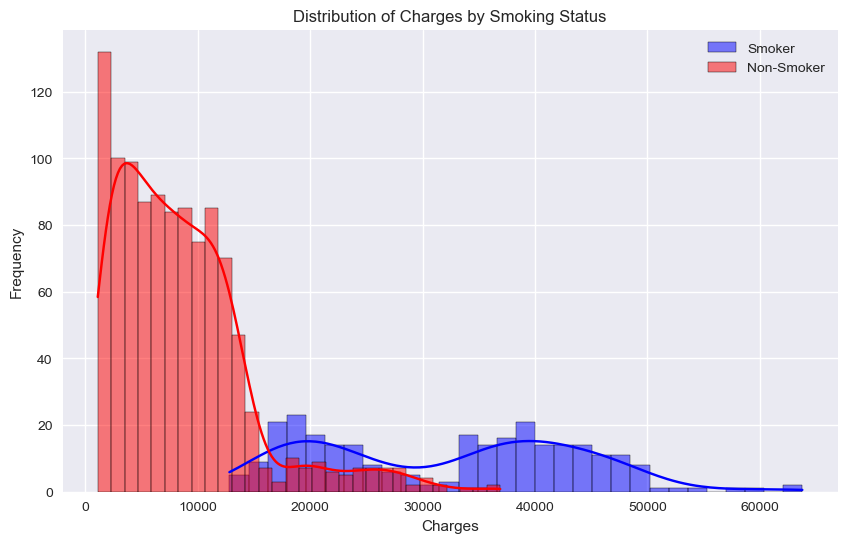

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['smoker'] == "yes"]['charges'], color='blue', label='Smoker', kde=True, bins=30)
sns.histplot(df[df['smoker'] == "no"]['charges'], color='red', label='Non-Smoker', kde=True, bins=30)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges by Smoking Status')
plt.legend()
plt.show()

In [27]:
smoker_age_avg=df.groupby("smoker")["age"].mean()
smoker_age_avg

smoker
no     39.385338
yes    38.514599
Name: age, dtype: float64

In [28]:
age_smoker_count=df.groupby(["age","smoker"]).size().unstack(fill_value=0)
age_smoker_count

smoker,no,yes
age,,
18,57,12
19,50,18
20,20,9
21,26,2
22,22,6
23,21,7
24,22,6
25,23,5
26,25,3


<Figure size 1200x600 with 0 Axes>

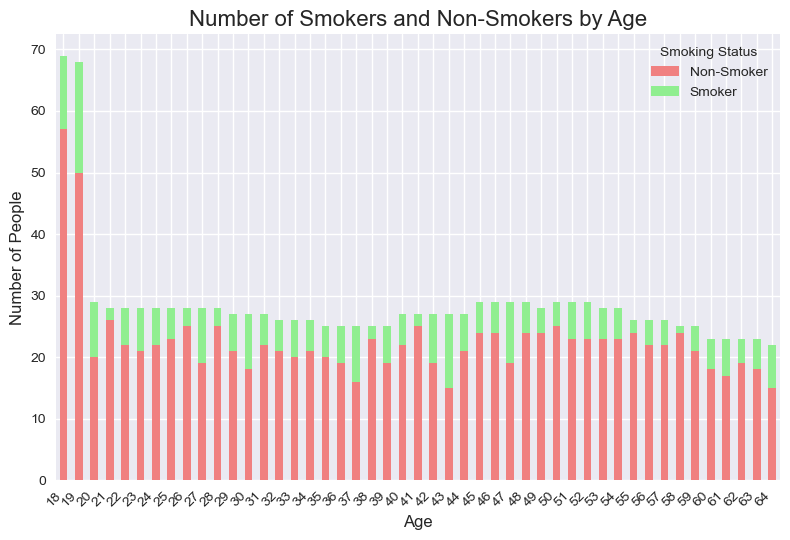

In [29]:
age_smoker_count = df.groupby(["age", "smoker"]).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
age_smoker_count.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])

plt.title('Number of Smokers and Non-Smokers by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Smoking Status', labels=['Non-Smoker', 'Smoker'])

plt.tight_layout()
plt.show()

In [30]:
smoker_bmi_avg=df.groupby("smoker")["bmi"].mean()
smoker_bmi_avg

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

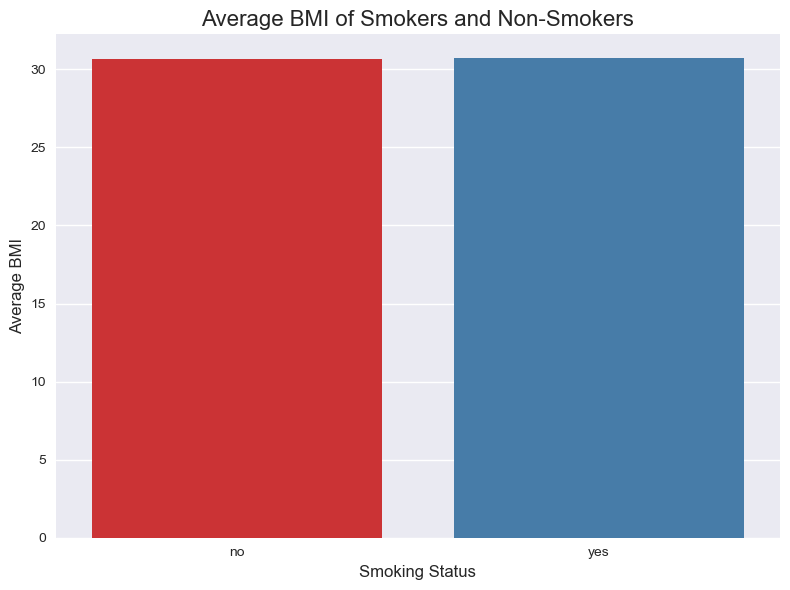

In [31]:
smoker_bmi_avg = df.groupby("smoker")["bmi"].mean()
smoker_bmi_avg

plt.figure(figsize=(8, 6))
sns.barplot(x=smoker_bmi_avg.index, y=smoker_bmi_avg.values, palette="Set1")

plt.title('Average BMI of Smokers and Non-Smokers', fontsize=16)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Average BMI', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

BMİ ANALYSİS

bmi_cat
Obese             550
Overweight        407
Normal weight     311
Morbidly Obese     70
Underweight         0
Name: count, dtype: int64


bmi_cat
Underweight                NaN
Normal weight     10415.137663
Overweight        11655.172231
Obese             15540.833025
Morbidly Obese    17508.627370
Name: charges, dtype: float64




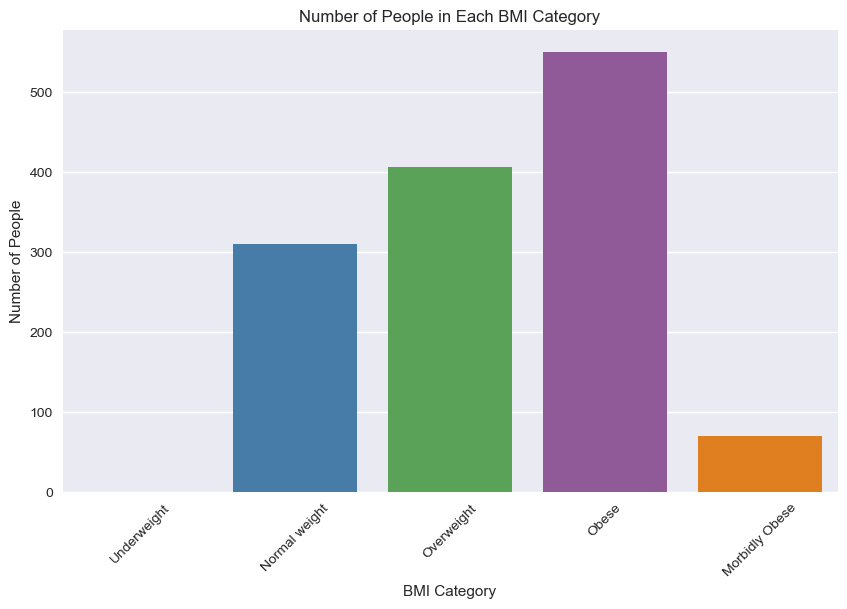

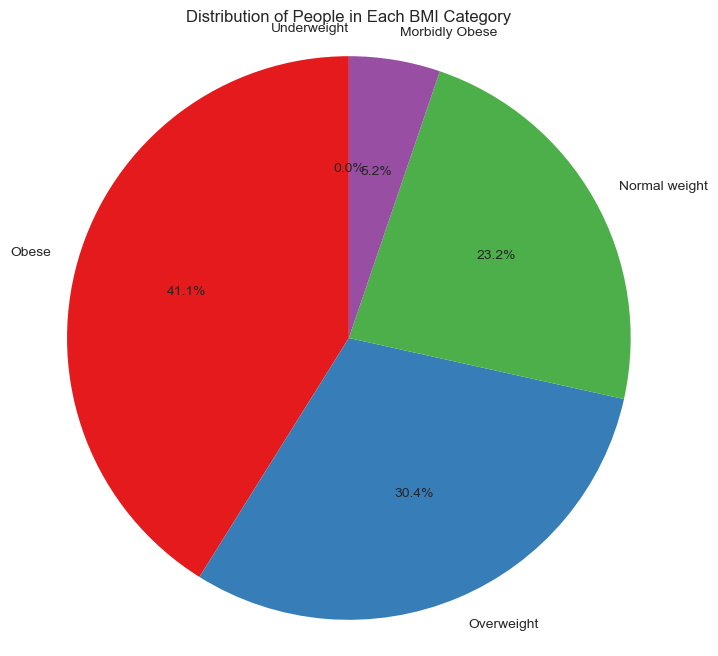

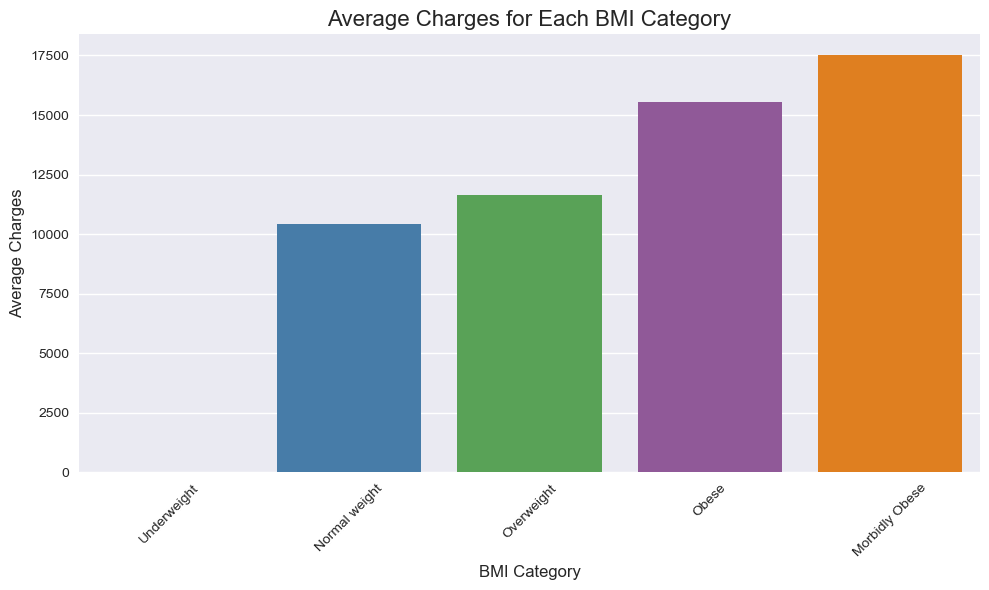

In [32]:
bmi_bins = [0.0, 15.9, 25.9, 30.9, 40.9, float("inf")]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese', 'Morbidly Obese'] 
df["bmi_cat"] = pd.cut(df["bmi"], bins=bmi_bins, labels=bmi_labels, right=False)

bmi_counts = df["bmi_cat"].value_counts()
print(bmi_counts)
print("\n")

avg_charges_bmi = df.groupby("bmi_cat")["charges"].mean()
print(avg_charges_bmi)
print("\n")

plt.figure(figsize=(10, 6))
sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette="Set1")
plt.xlabel("BMI Category")
plt.ylabel("Number of People")
plt.title("Number of People in Each BMI Category")
plt.xticks(rotation=45)
plt.show()

print("\n")
plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set1", len(bmi_counts)))
plt.title("Distribution of People in Each BMI Category")
plt.axis('equal') 
plt.show()

print("\n")

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_charges_bmi.index, y=avg_charges_bmi.values, palette="Set1")

plt.title('Average Charges for Each BMI Category', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Average Charges', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [33]:
bmi_bins = [0.0, 15.9, 25.9, 30.9, 40.9, float("inf")]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese',"morbid obese"] 
df["bmi_cat"]=pd.cut(df["bmi"],bins=bmi_bins,labels=bmi_labels,right=False)
age_by_bmi=df.groupby("bmi_cat")["age"].mean()
print(age_by_bmi)


bmi_cat
Underweight            NaN
Normal weight    37.414791
Overweight       38.294840
Obese            40.694545
morbid obese     40.785714
Name: age, dtype: float64


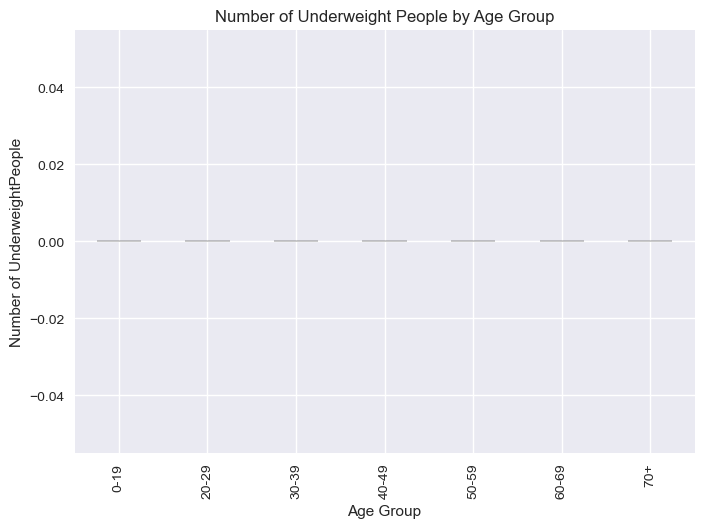

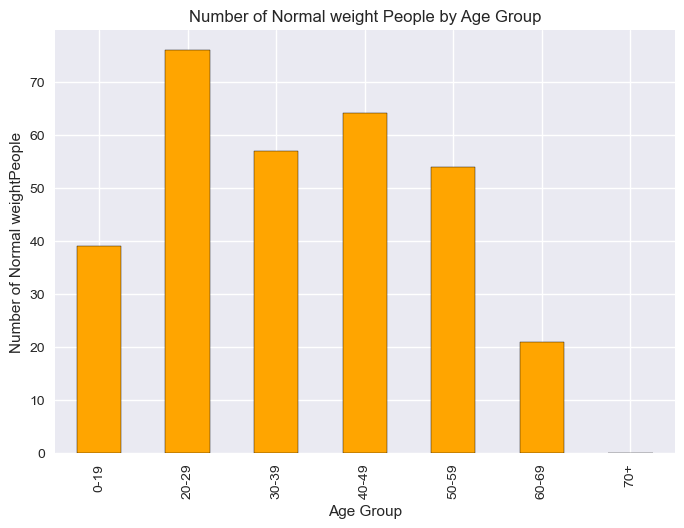

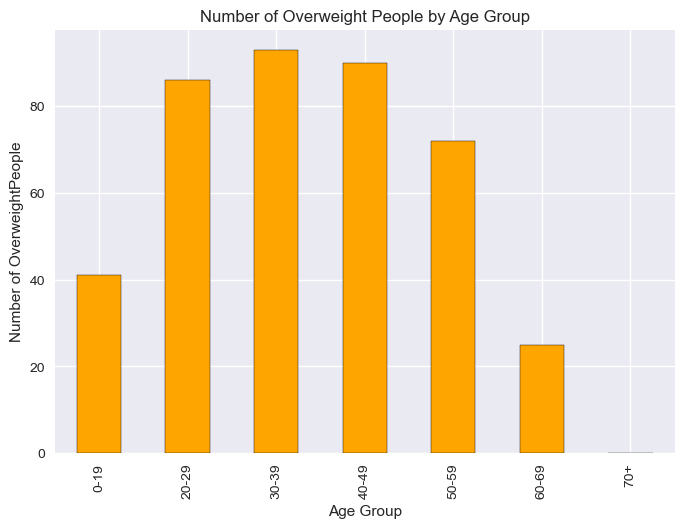

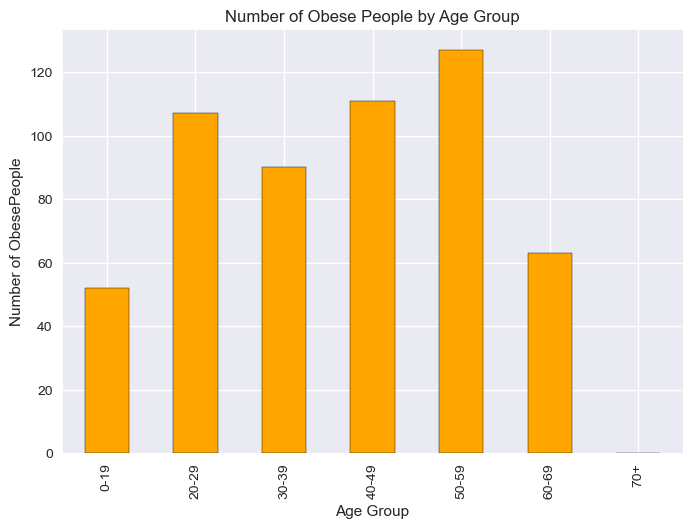

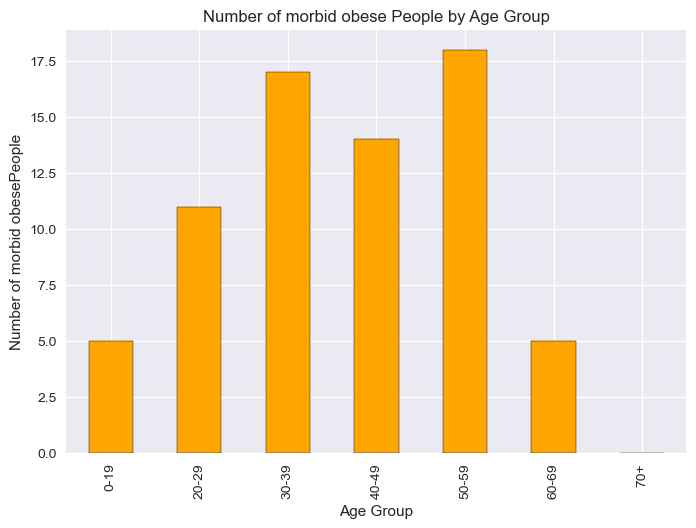

In [34]:
age_bins = [0, 20, 30, 40, 50, 60, 70, float("inf")]
age_labels = ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese',"morbid obese"] 
df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)
for i in bmi_labels:
    obese_age_groups = df[df["bmi_cat"] ==i]["age_group"].value_counts()

    obese_age_groups.sort_index().plot(kind="bar", color="orange", edgecolor="black")
    plt.xlabel("Age Group")
    plt.ylabel("Number of "+ i +"People")
    plt.title("Number of "+i+ " People by Age Group")
    plt.show()

In [35]:
children_charge_avg=df.groupby("children")["charges"].mean()
children_charge_total=df.groupby("children")["charges"].sum()
print(children_charge_avg)
print("\n")
print(children_charge_total)

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


children
0    7.098070e+06
1    4.124900e+06
2    3.617655e+06
3    2.410785e+06
4    3.462664e+05
5    1.581486e+05
Name: charges, dtype: float64


An increase in the number of children did not positively affect the charges. This raises the question of whether the data only represents charges per person or if a person's children's health charges are included in the total. We can look into that.

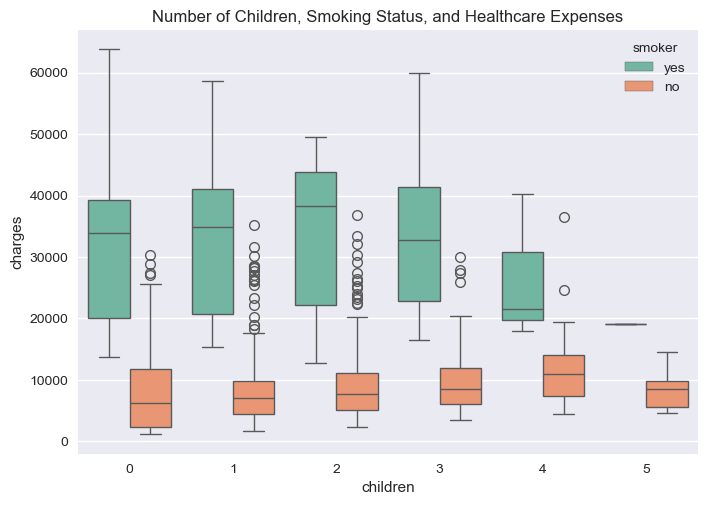

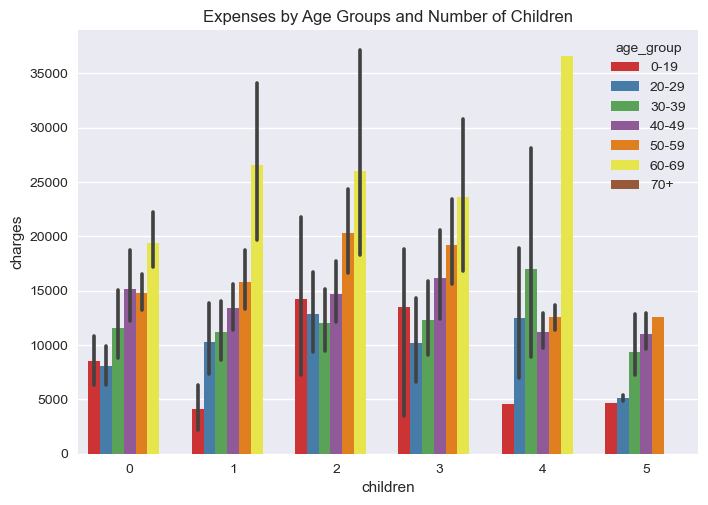

In [36]:
age_bins = [0, 20, 30, 40, 50, 60, 70, float("inf")]
age_labels = ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]
df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)

sns.boxplot(x="children", y="charges", hue="smoker", data=df, palette="Set2")
plt.title("Number of Children, Smoking Status, and Healthcare Expenses")
plt.show()

print("\n")

sns.barplot(x="children", y="charges", hue="age_group", data=df, palette="Set1")
plt.title("Expenses by Age Groups and Number of Children")
plt.show()

In [37]:
import statsmodels.formula.api as smf

model = smf.ols("charges ~ children + age + bmi + smoker", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:09:13   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.21e+04    941.984    -12.848

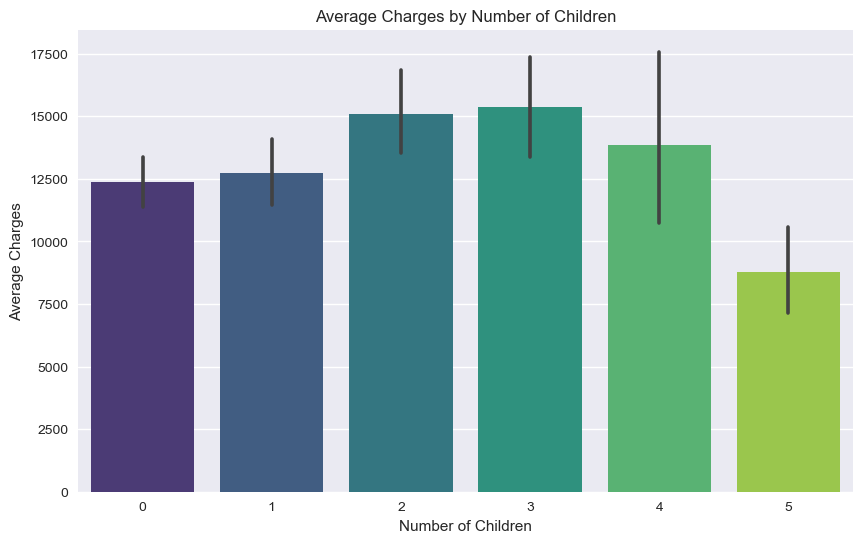

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x="children", y="charges", data=df, estimator="mean", palette="viridis")
plt.xlabel("Number of Children")
plt.ylabel("Average Charges")
plt.title("Average Charges by Number of Children")
plt.show()

REGİON ANALYSİS

In [39]:
columns_to_calculate = ["age", "charges", "children", "bmi"]
region_stats = df.groupby("region")[columns_to_calculate].mean()
region_stats

,age,charges,children,bmi
region,,,,
northeast,39.268519,13406.384516,1.046296,29.173503
northwest,39.196923,12417.575374,1.147692,29.199785
southeast,38.939560,14735.411438,1.049451,33.355989
southwest,39.455385,12346.937377,1.141538,30.596615


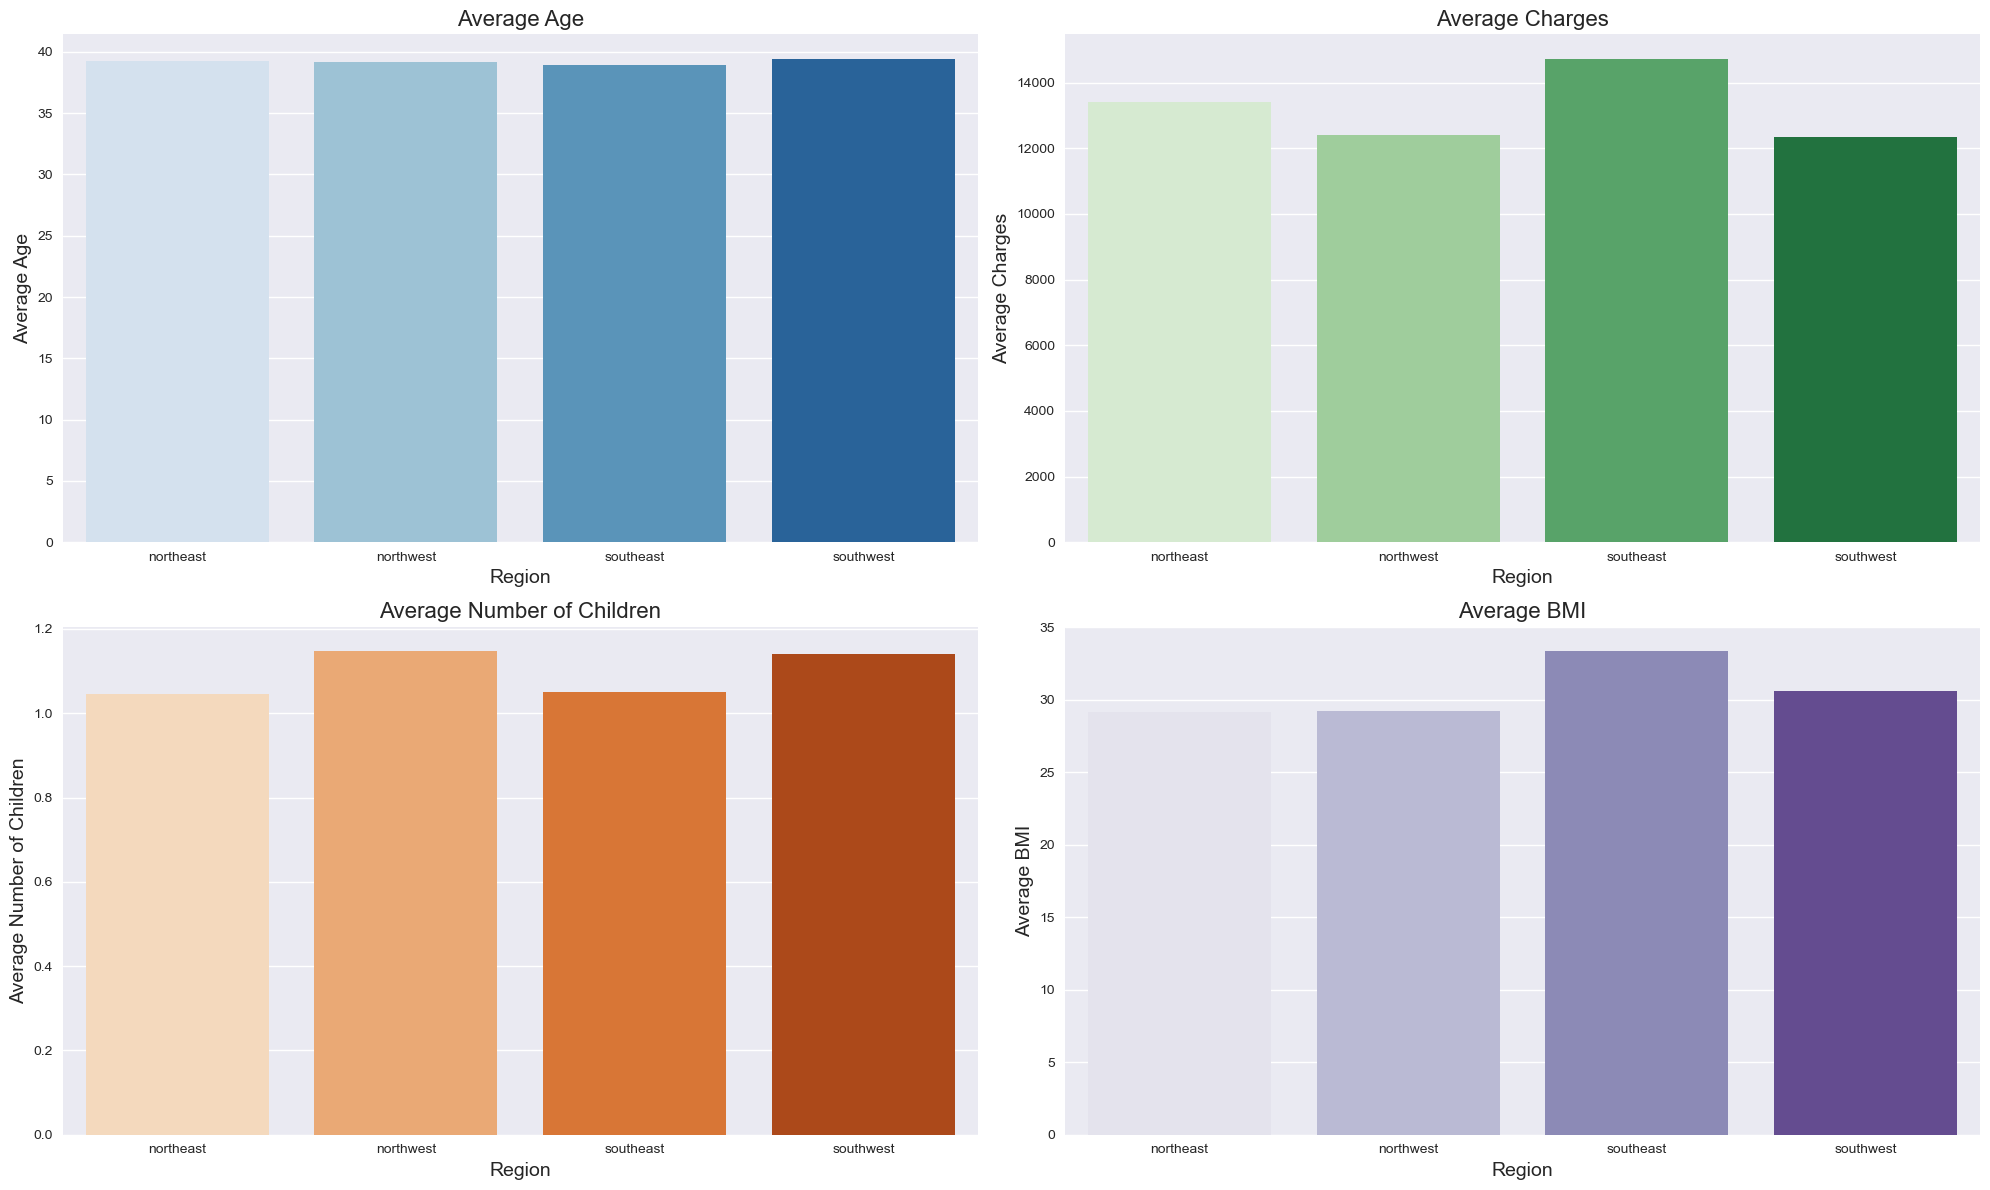

In [40]:
columns_to_calculate = ["age", "charges", "children", "bmi"]
titles = ["Average Age", "Average Charges", "Average Number of Children", "Average BMI"]
colors = ["Blues", "Greens", "Oranges", "Purples"]

region_stats = df.groupby("region")[columns_to_calculate].mean()

plt.figure(figsize=(20, 12))

for i, col in enumerate(columns_to_calculate):
    plt.subplot(2, 2, i + 1)  
    sns.barplot(x=region_stats.index, y=region_stats[col], palette=colors[i])
    plt.title(titles[i], fontsize=16)
    plt.xlabel("Region", fontsize=14)
    plt.ylabel(titles[i], fontsize=14)

plt.tight_layout()
plt.show()


In [41]:
smoker_region_count = df.groupby("region")["smoker"].value_counts()
smoker_region_count

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: count, dtype: int64

In [42]:
#df = df.drop(['age_group'], axis=1)
df=df.drop(["bmi_cat"],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,0-19
1,18,male,33.770,1,no,southeast,1725.55230,0-19
2,28,male,33.000,3,no,southeast,4449.46200,20-29
3,33,male,22.705,0,no,northwest,21984.47061,30-39
4,32,male,28.880,0,no,northwest,3866.85520,30-39


LABEL ENCODİNG

In [43]:
print(df["region"].unique())
print(df["sex"].unique())
print(df["smoker"].unique())

['southwest' 'southeast' 'northwest' 'northeast']
['female' 'male']
['yes' 'no']


In [44]:
from sklearn.preprocessing import LabelEncoder

#sex
le=LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex=le.transform(df.sex)

#region
le.fit(df.region.drop_duplicates())
df.region=le.transform(df.region)

#smoker
le.fit(df.smoker.drop_duplicates())
df.smoker=le.transform(df.smoker) 


In [45]:
print(df["region"].unique())
print(df["sex"].unique())
print(df["smoker"].unique())

[3 2 1 0]
[0 1]
[1 0]


In [47]:
print(df.dtypes)

age             int64
sex             int32
bmi           float64
children        int64
smoker          int32
region          int32
charges       float64
age_group    category
dtype: object


CORRELATION

In [48]:
df['age_group'] = df['age_group'].cat.codes
df.corr()['charges'].sort_values()

region      -0.006208
sex          0.057292
children     0.067998
bmi          0.198341
age_group    0.298309
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

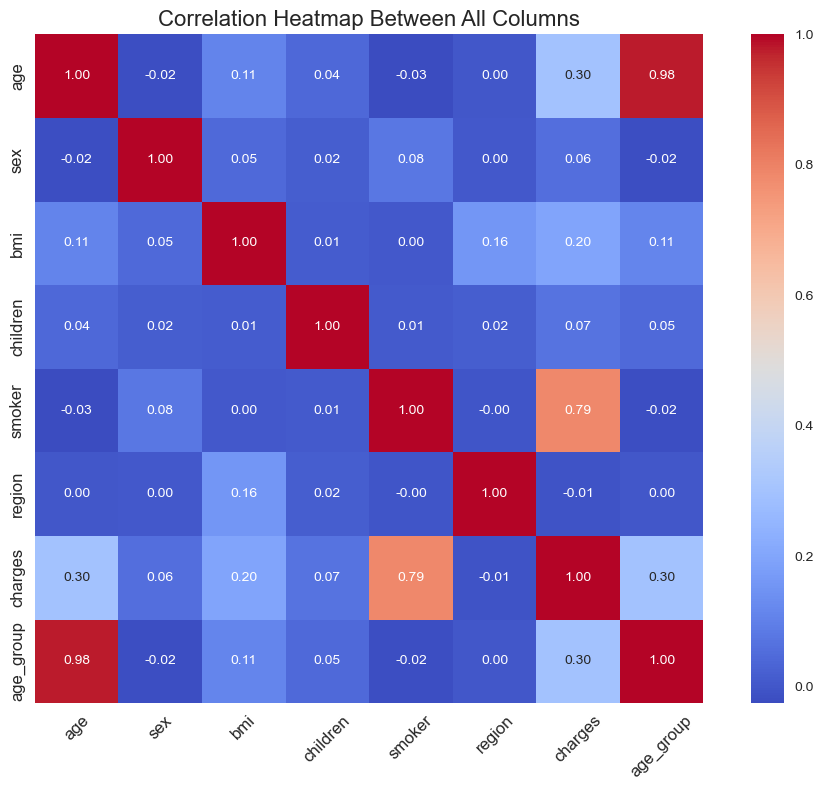

In [49]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Correlation Heatmap Between All Columns", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

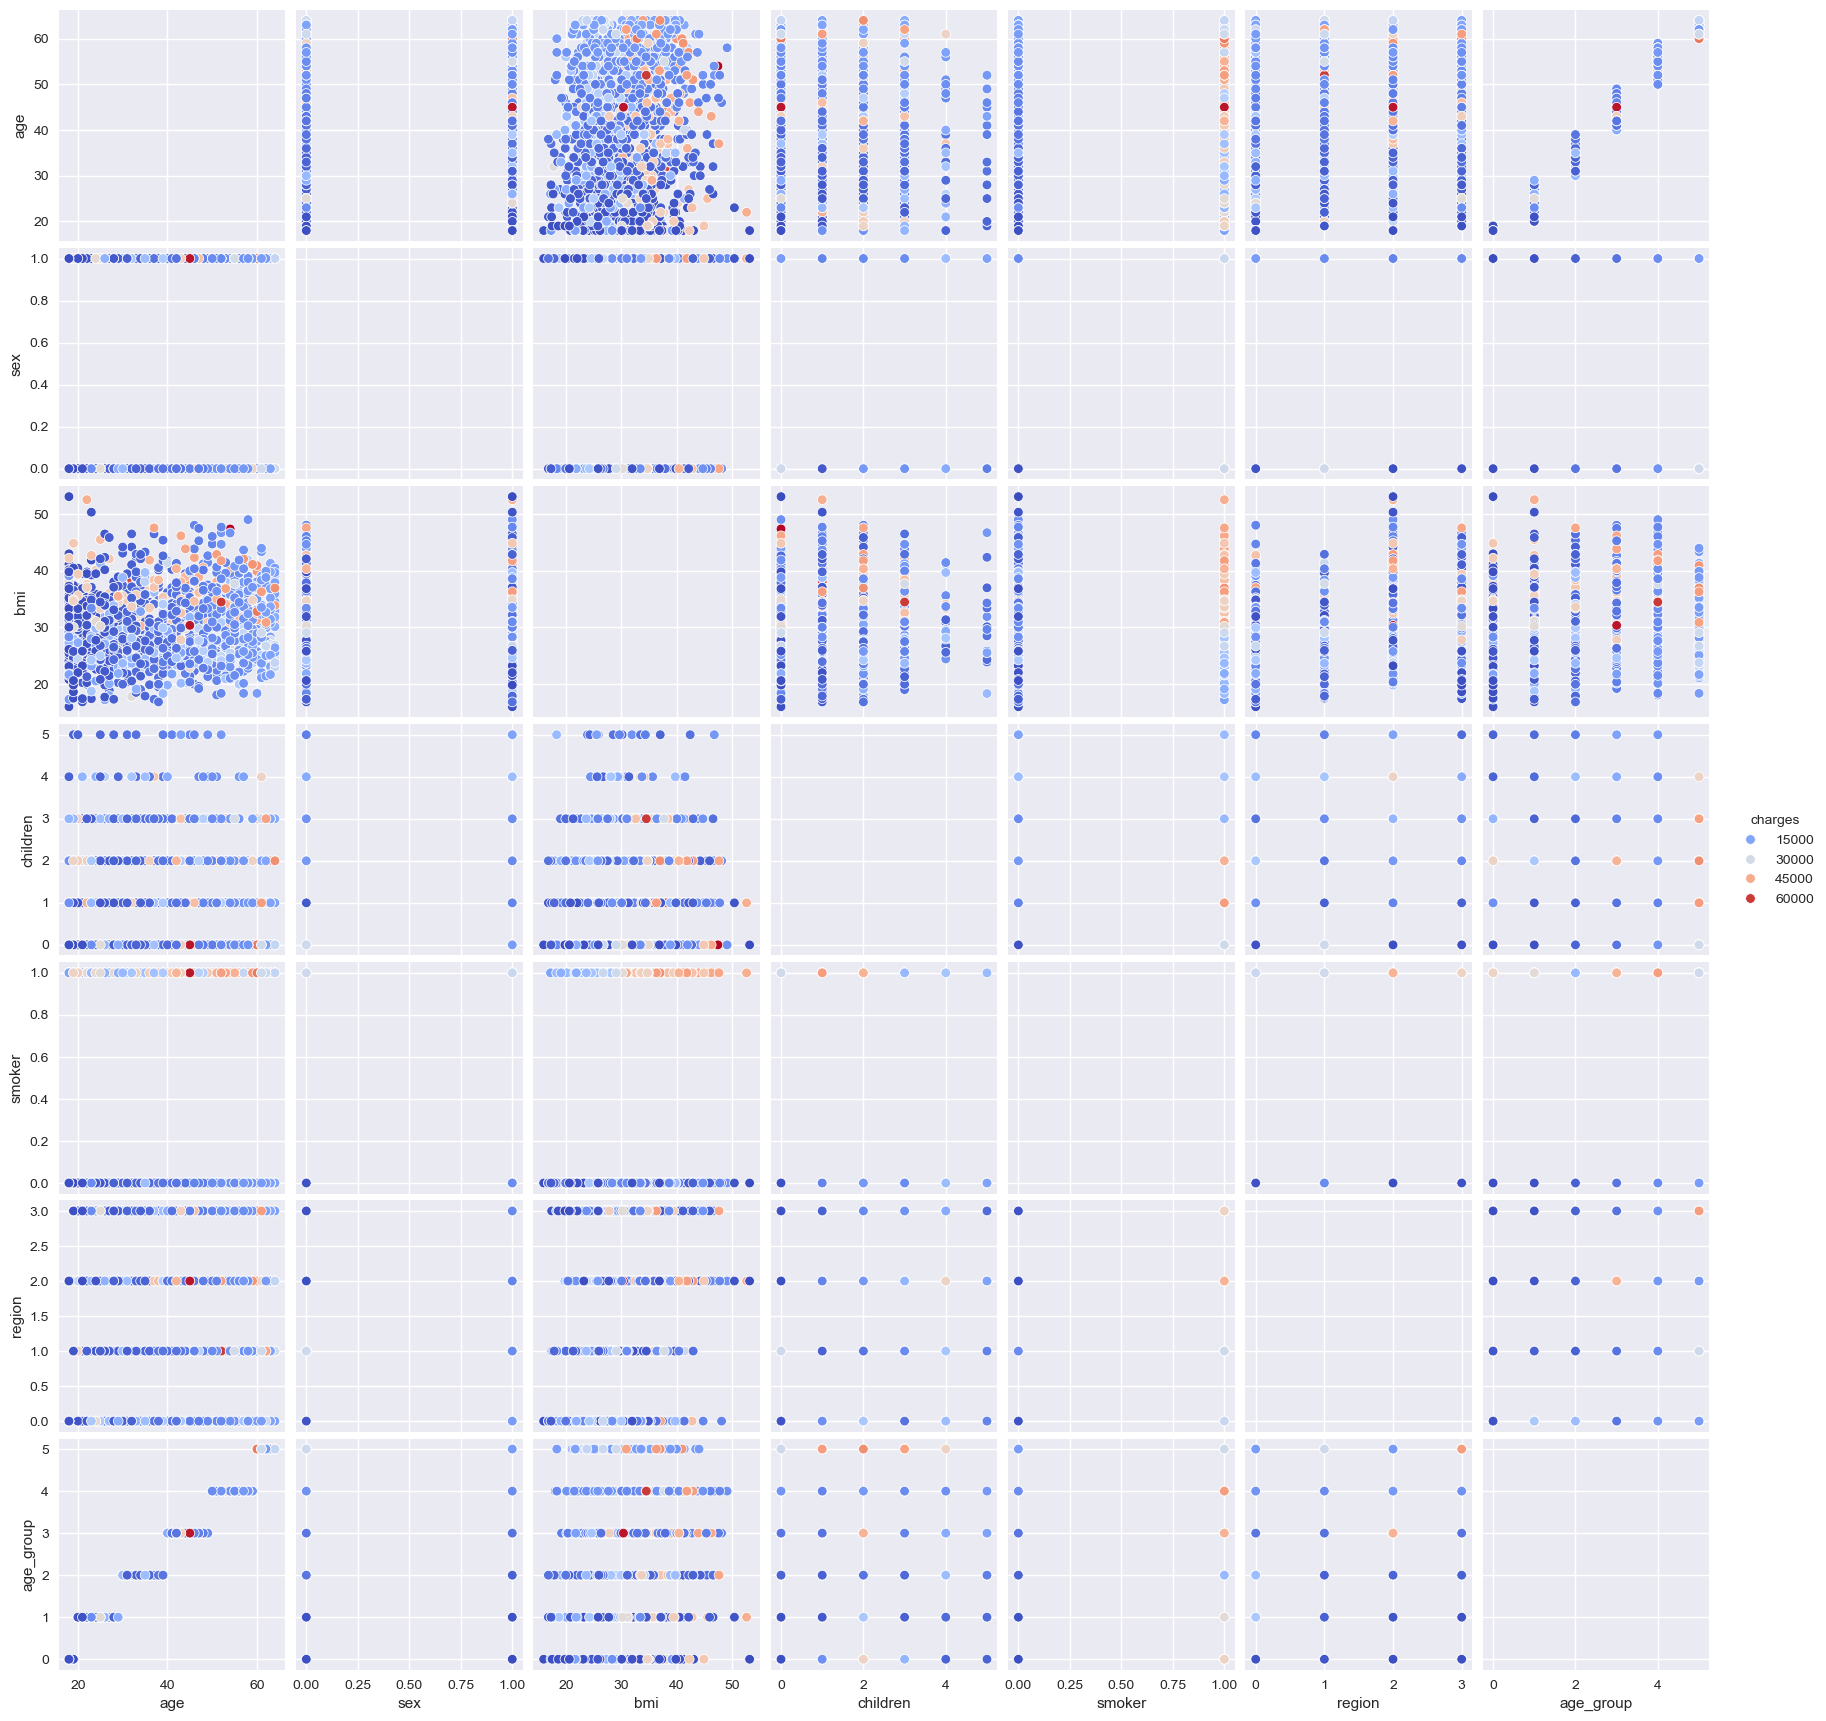

In [50]:
sns.pairplot(df, hue="charges", diag_kind="kde", palette="coolwarm")

MACHİNE LEARNİNG PART

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error


In [52]:
best_score = 0
best_state = None

x=df.drop(["charges"],axis=1)
y=df.charges

for state in range(100): 
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=state, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_state = state

print(f"Best random_state: {best_state}, Best Score: {best_score}")

Best random_state: 0, Best Score: 0.7996491464512829


In [53]:
x=df.drop(["charges"],axis=1)
y=df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr=LinearRegression()
lr.fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962656577600612


In [54]:
X = df.drop(['charges','region'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8850917354687898


In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

x = df.drop("charges", axis=1)  
y = df["charges"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsRegressor(n_neighbors=5)


knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


r2 = knn.score(X_test, y_test)
print(f"R^2 Score: {r2}")

Mean Squared Error: 125732594.61723185
R^2 Score: 0.1901215977156353


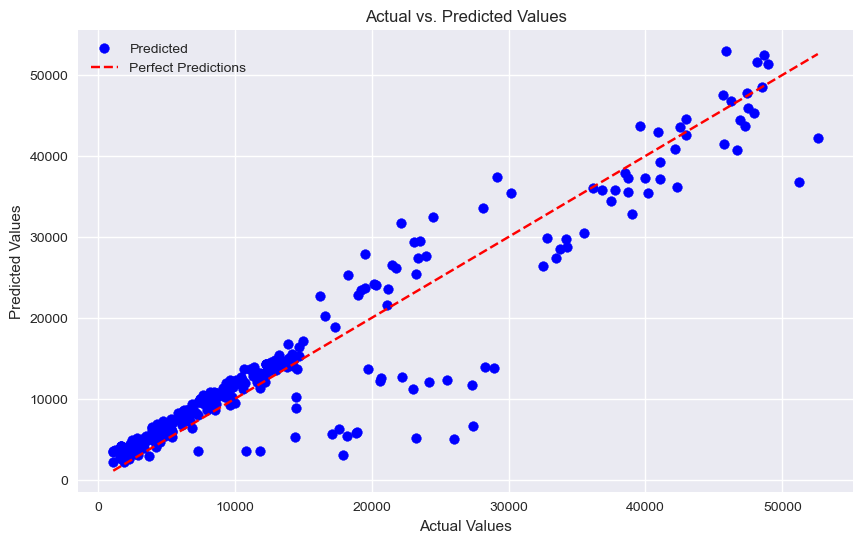

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_test_pred, color='blue', label='Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Perfect Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

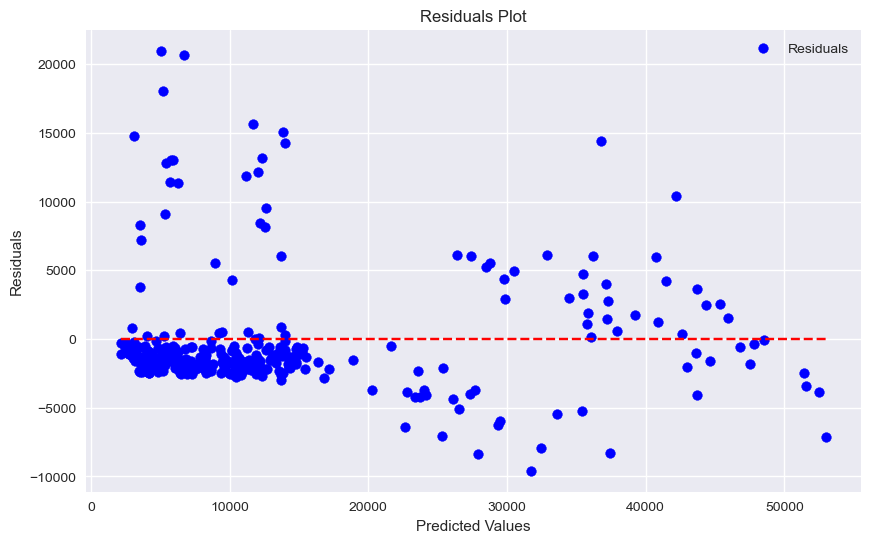

In [57]:
residuals = Y_test - Y_test_pred

plt.figure(figsize=(10,6))
plt.scatter(Y_test_pred, residuals, color='blue', label='Residuals')
plt.hlines(y=0, xmin=min(Y_test_pred), xmax=max(Y_test_pred), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

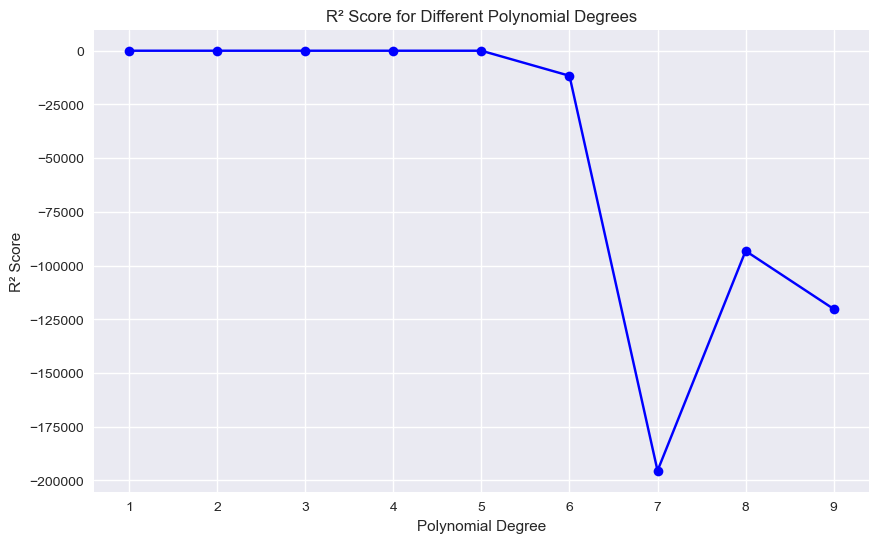

In [58]:
scores = []
for i in range(1, 10):
    quad = PolynomialFeatures(degree=i)
    x_quad = quad.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(x_quad, Y, random_state=0)
    plr = LinearRegression().fit(X_train, Y_train)
    score = plr.score(X_test, Y_test)
    scores.append(score)

plt.figure(figsize=(10,6))
plt.plot(range(1, 10), scores, marker='o', linestyle='-', color='b')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score for Different Polynomial Degrees')
plt.grid(True)
plt.show()

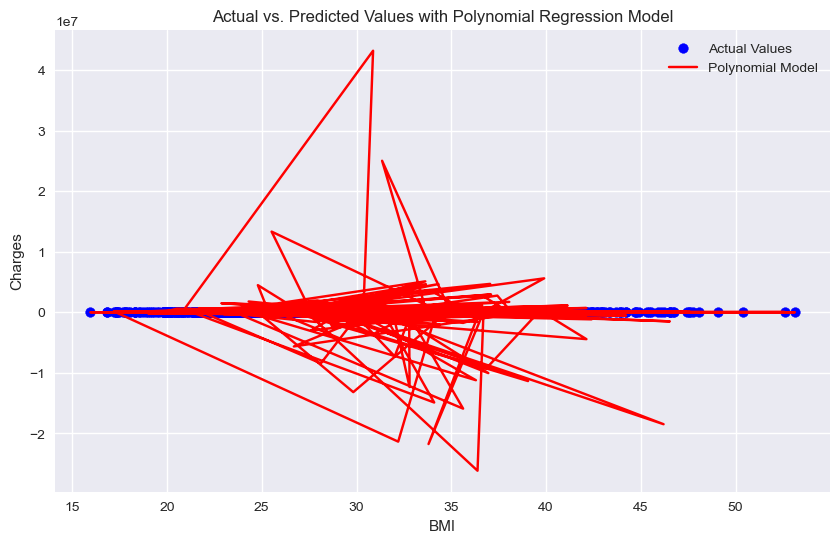

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(X['bmi'], Y, color='blue', label='Actual Values')
plt.plot(X['bmi'], plr.predict(quad.fit_transform(X)), color='red', label='Polynomial Model')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Actual vs. Predicted Values with Polynomial Regression Model')
plt.legend()
plt.show()

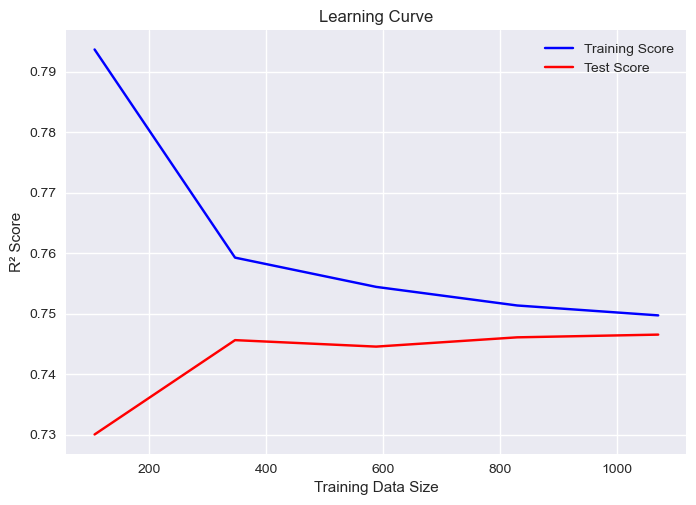

In [60]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(plr, X, Y, cv=5)


train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)


plt.plot(train_sizes, train_mean, label="Training Score", color='blue')
plt.plot(train_sizes, test_mean, label="Test Score", color='red')
plt.xlabel("Training Data Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [61]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df.drop(['charges', 'region'], axis=1)  
Y = df['charges']  


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, Y_train)


Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)


train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)


print(f"Training Set R² Score: {train_score}")
print(f"Test Set R² Score: {test_score}")
print(f"Training Set MSE: {train_mse}")
print(f"Test Set MSE: {test_mse}")

if train_score - test_score > 0.1:
    print("The model is overfitting!")
elif train_mse < test_mse:
    print("The model is overfitting!")
else:
    print("The model is well generalized.")

Training Set R² Score: 0.7411198411965594
Test Set R² Score: 0.780935333432173
Training Set MSE: 37365110.96672905
Test Set MSE: 34009511.59932346
The model is well generalized.


In [62]:
from sklearn.linear_model import Ridge
X=df.drop(["charges","region"],axis=1)
y=df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

y_pred=ridge.predict(X_test)

print("R2 Score:", ridge.score(X_test, y_test))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.7976101321858516
MSE: 32206292.039645407
